#### Load dataset

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import re

df = pd.read_csv("C:\\Users\\dolap\\OneDrive\\Documents\\DOLAPO\\data-analysis\\literature_syn_analysis\\fully_screened.csv")


#### Clean and summarise imaging methods

In [23]:
def clean_text(text):
    """Lowercase, remove special characters, normalize whitespace."""
    if pd.isna(text):
        return ""
    text = text.lower().strip()
    text = re.sub(r'[^a-z0-9, ]+', '', text)  # keep alphanumeric + comma
    text = re.sub(r'\s+', ' ', text)
    return text

def split_items(text):
    """Split on commas."""
    return [i.strip() for i in text.split(",") if i.strip()]

In [24]:
def replace_synonyms(item_list, mapping):
    """Apply dictionary mapping to list items."""
    cleaned = []
    for item in item_list:
        cleaned.append(mapping.get(item, item))
    return cleaned

#### CLEAN COLUMNS

In [25]:
df["Imaging Method Clean"] = df["Imaging Method"].apply(clean_text)
df["Indicator Clean"] = df["Biodiversity Indicators Type"].apply(clean_text)

df["Method List Raw"] = df["Imaging Method Clean"].apply(split_items)
df["Indicator List Raw"] = df["Indicator Clean"].apply(split_items)

#### SYNONYM DICTIONARIES

In [26]:
method_map = {
    "photoquadrat": "photoquadrats",
    "photo quadrat": "photoquadrats",
    "phototransect": "photoquadrats",
    "bruvs": "bruv",
    "baited remote underwater video": "bruv",
    "satellite image": "satellite imagery",
    "satellite imageryremote sensing": "satellite imagery",
    "remote sensing": "satellite imagery",
    "sfm": "structure-from-motion",
    "structure from motion": "structure-from-motion",
}

indicator_map = {
    "species richness": "richness",
    "species diversity": "diversity",
    "species composition": "composition",
    "species distribution": "distribution",
    "spatial distribution": "distribution",
    "species abundance": "abundance",
    "relative abundance": "abundance",
    "abundance": "abundance",
    "species coverage": "cover",
    "percent cover": "cover",
    "species percent cover": "cover",
    "habitat structure": "complexity",
    "structural complexity": "complexity",
}

#### APPLY NORMALIZATION

In [27]:
df["Method List"] = df["Method List Raw"].apply(lambda x: replace_synonyms(x, method_map))
df["Indicator List"] = df["Indicator List Raw"].apply(lambda x: replace_synonyms(x, indicator_map))


### DATA EXPLORATION

In [28]:
methods_exploded = df.explode("Method List")
indicators_exploded = df.explode("Indicator List")

method_counts = methods_exploded["Method List"].value_counts()
indicator_counts = indicators_exploded["Indicator List"].value_counts()

year_counts = df["year"].value_counts().sort_index()
# remove year 2026 if present
year_counts_new = year_counts.drop(labels=2026, errors="ignore")


In [29]:
method_counts

Method List
satellite imagery                      62
bruv                                   36
rov                                    32
dov                                    24
photoquadrats                          22
auv                                    18
uav                                    16
structure-from-motion                  12
still images                            7
usv                                     3
aerial photographs                      3
uvc                                     2
uas                                     2
satellite images                        2
aerial photograph                       2
towed camera                            2
aerial photography                      2
remote video                            1
auvs                                    1
camera trap                             1
towed videos                            1
underwater vidoes                       1
aerial imagery                          1
camera transects      

#### CROSSTAB (Top 6 methods × Top 8 indicators)

In [30]:
top_methods = method_counts.head(6).index.tolist()
top_inds = indicator_counts.head(8).index.tolist()

rows = []
for _, r in df.iterrows():
    for m in r["Method List"]:
        for ind in r["Indicator List"]:
            rows.append((m, ind))

mi_df = pd.DataFrame(rows, columns=["Method", "Indicator"])
mi_top = mi_df[mi_df["Method"].isin(top_methods) & mi_df["Indicator"].isin(top_inds)]
crosstab_top = pd.crosstab(mi_top["Method"], mi_top["Indicator"])

#### SAVE ALL OUTPUT FILES

In [31]:
df.to_csv("cleaned_full_dataset.csv", index=False)
methods_exploded.to_csv("cleaned_methods_exploded.csv", index=False)
indicators_exploded.to_csv("cleaned_indicators_exploded.csv", index=False)
method_counts.to_csv("method_counts_cleaned.csv")
indicator_counts.to_csv("indicator_counts_cleaned.csv")
year_counts.to_csv("year_counts_cleaned.csv")
crosstab_top.to_csv("method_indicator_heatmap.csv")

#### VISUALISATION

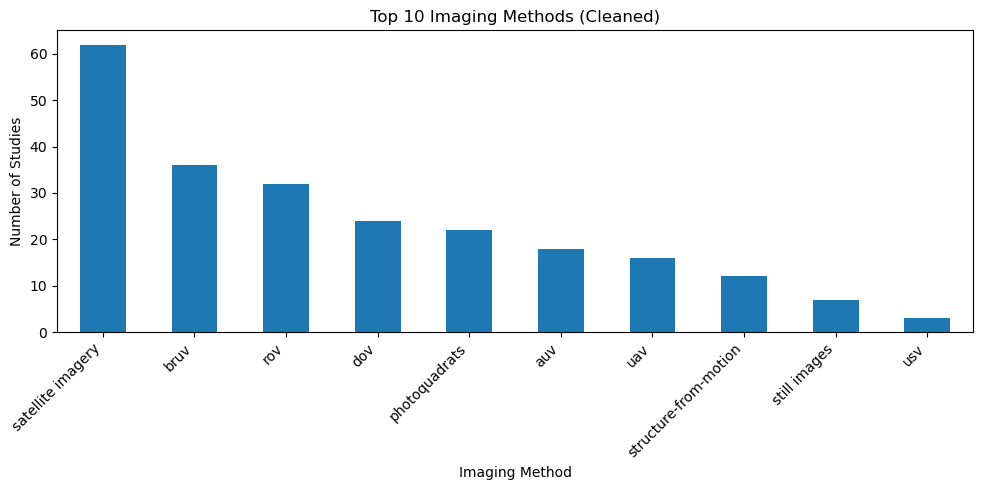

In [19]:
plt.figure(figsize=(10, 5))
method_counts.head(10).plot(kind="bar")
plt.title("Top 10 Imaging Methods (Cleaned)")
plt.xlabel("Imaging Method")
plt.ylabel("Number of Studies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

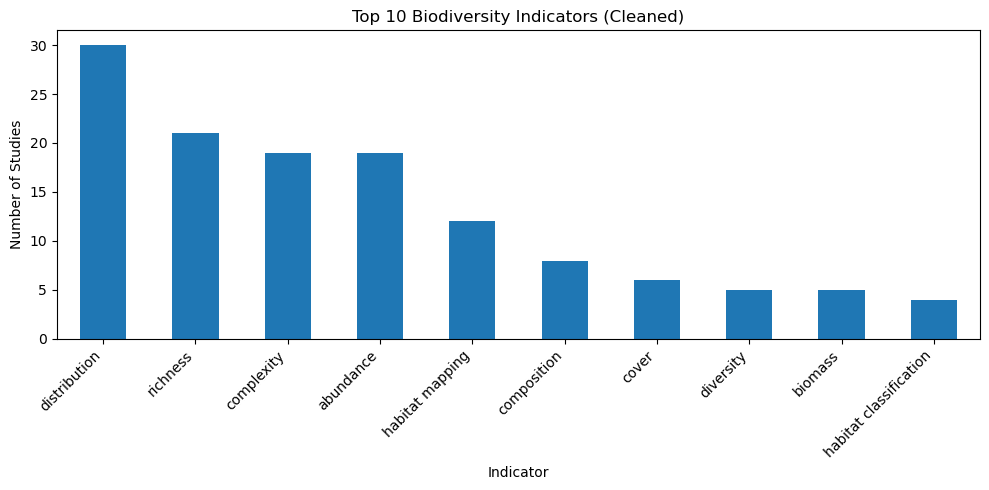

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 5))
indicator_counts.head(10).plot(kind="bar")
plt.title("Top 10 Biodiversity Indicators (Cleaned)")
plt.xlabel("Indicator")
plt.ylabel("Number of Studies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 5))

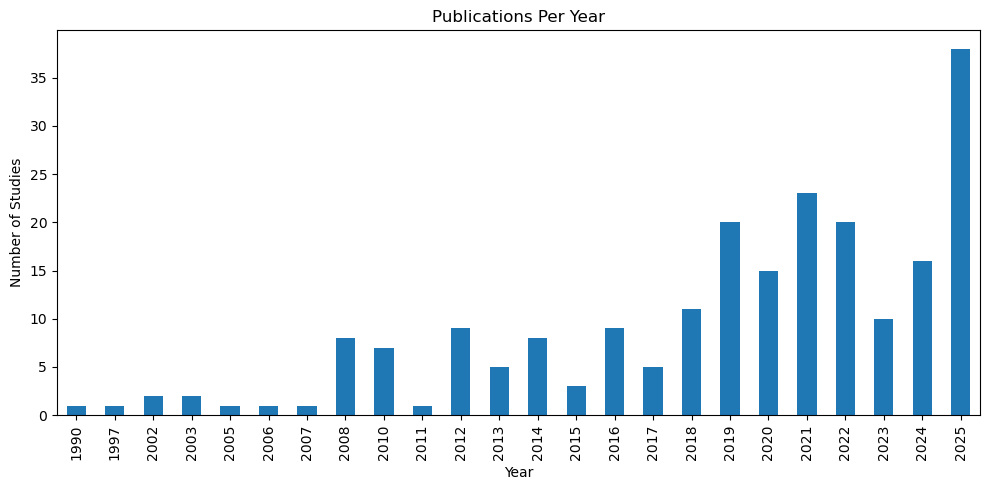

In [23]:
plt.figure(figsize=(10, 5))
year_counts_new.plot(kind="bar")
plt.title("Publications Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Studies")
plt.tight_layout()
plt.show()

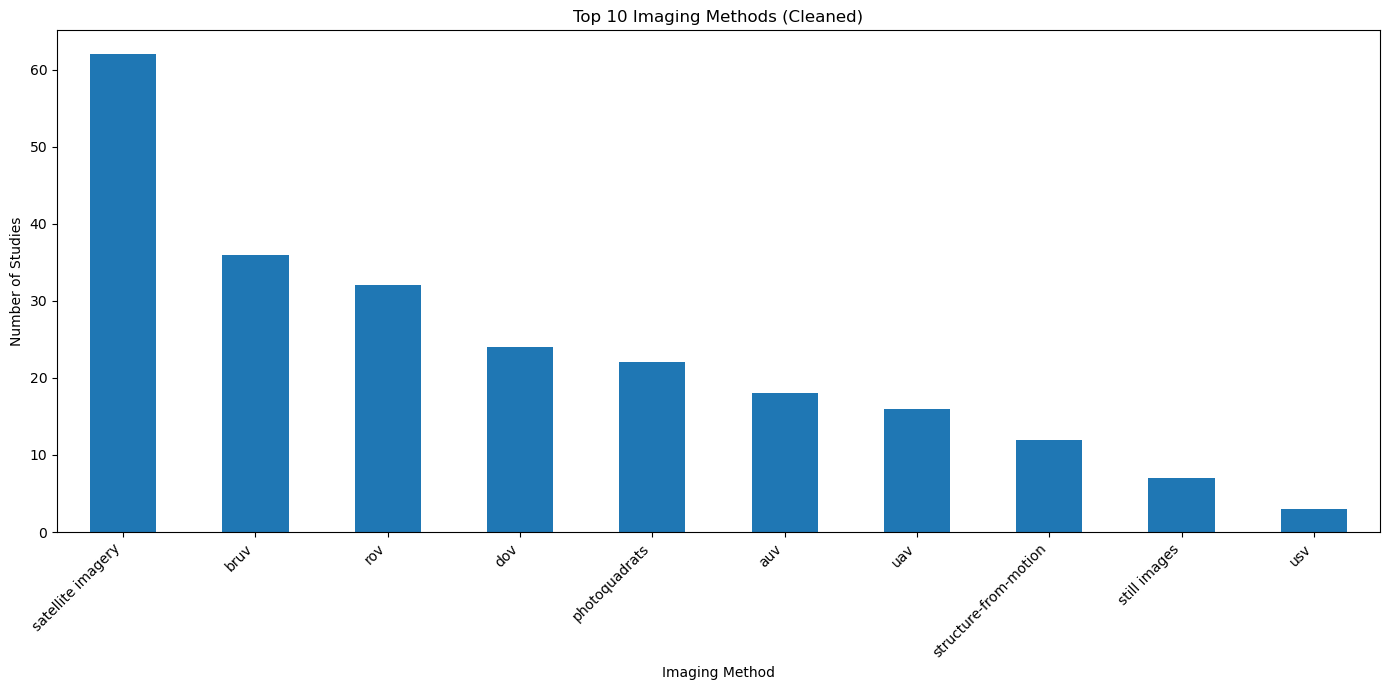

In [35]:
data = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\literature_syn_analysis\scripts\top_methods.csv"
data = pd.read_csv(data)
data

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
data.head(10).set_index('Method List').plot(kind="bar", ax=ax, legend=False)
ax.set_title("Top 10 Imaging Methods (Cleaned)")
ax.set_xlabel("Imaging Method")
ax.set_ylabel("Number of Studies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

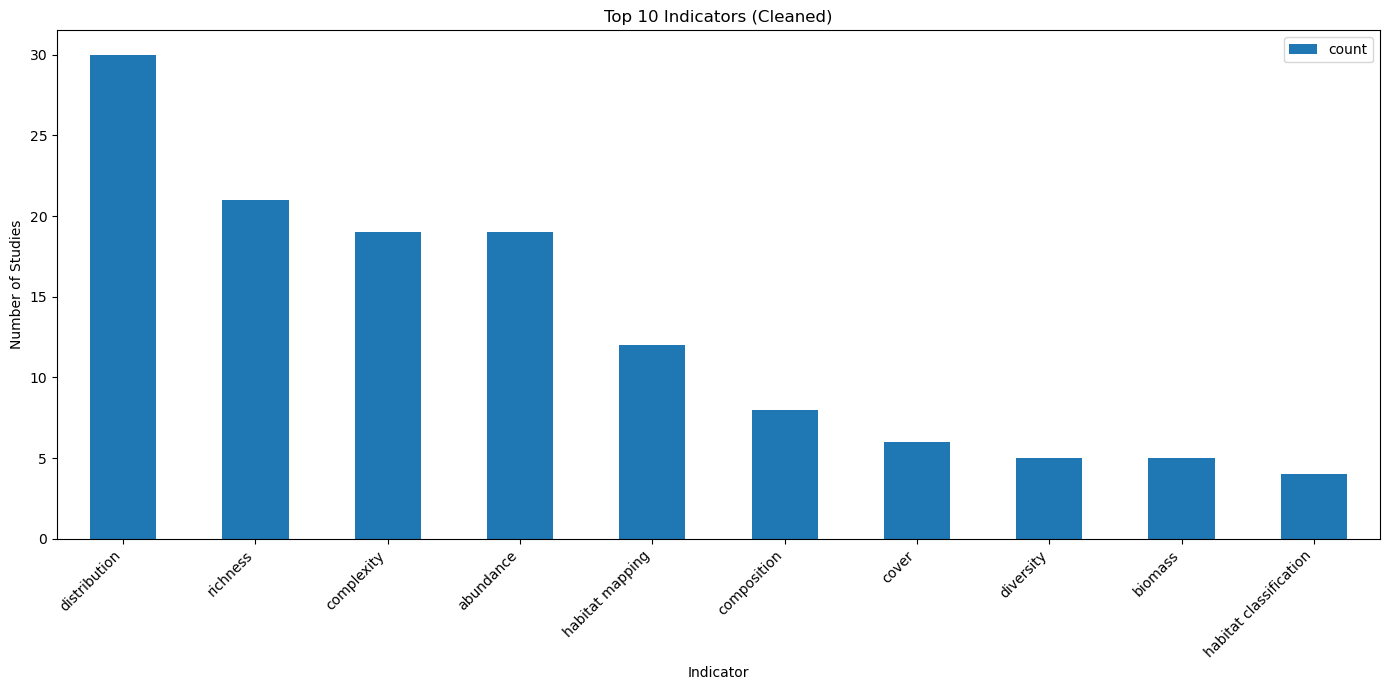

In [34]:
data = r"C:\Users\dolap\OneDrive\Documents\DOLAPO\data-analysis\literature_syn_analysis\scripts\top_indicator.csv"
data = pd.read_csv(data)
data

# Plot
fig, ax = plt.subplots(figsize=(14, 7))
data.head(10).set_index('Indicator List').plot(kind="bar", ax=ax)
ax.set_title("Top 10 Indicators (Cleaned)")
ax.set_xlabel("Indicator")
ax.set_ylabel("Number of Studies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()